In [1]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('employee_retention_data.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [6]:
data.isnull().sum(axis=0)

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [7]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [8]:
import datetime
d = datetime.date(2011,1,23)
delta = datetime.timedelta(days=1)
all_days = []
while d <= datetime.date(2015,12,13):
    all_days.append(d.strftime("%Y-%m-%d"))
    d += delta

In [9]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [10]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [12]:
comp_id_unique = sorted(data['company_id'].unique())
comp_id_unique

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
df = pd.DataFrame()

#for comps in comp_id_unique:
for days in all_days:
    days = datetime.datetime.strptime(days,'%Y-%m-%d')
    new_data = data[(data['join_date'] <= days) | (data['quit_date'] >= days)].groupby(['company_id']).size().reset_index(name='count')
    i = 1
    for index, row in new_data.iterrows():
        while (i != row['company_id']):
            df = df.append({'day': days, 'employee_headcount': 0,'company_id':i}, ignore_index=True)
            i = i + 1
        df = df.append({'day': days, 'employee_headcount': row['count'],'company_id':row['company_id']}, ignore_index=True)
        i = i + 1

In [15]:
df.head(30)

,company_id,day,employee_headcount
0,1.0,2011-01-23,4621.0
1,2.0,2011-01-23,2206.0
2,3.0,2011-01-23,1531.0
3,4.0,2011-01-23,1153.0
4,5.0,2011-01-23,983.0
5,6.0,2011-01-23,712.0
6,7.0,2011-01-23,692.0
7,8.0,2011-01-23,579.0
8,9.0,2011-01-23,529.0
9,10.0,2011-01-23,480.0


company_id
1.0     Axes(0.125,0.125;0.775x0.775)
2.0     Axes(0.125,0.125;0.775x0.775)
3.0     Axes(0.125,0.125;0.775x0.775)
4.0     Axes(0.125,0.125;0.775x0.775)
5.0     Axes(0.125,0.125;0.775x0.775)
6.0     Axes(0.125,0.125;0.775x0.775)
7.0     Axes(0.125,0.125;0.775x0.775)
8.0     Axes(0.125,0.125;0.775x0.775)
9.0     Axes(0.125,0.125;0.775x0.775)
10.0    Axes(0.125,0.125;0.775x0.775)
11.0    Axes(0.125,0.125;0.775x0.775)
12.0    Axes(0.125,0.125;0.775x0.775)
Name: employee_headcount, dtype: object

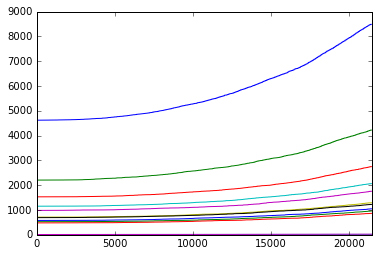

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('company_id')['employee_headcount'].plot()

In [17]:
data.dropna(inplace = True)

In [18]:
data['employment_length'] = (data['quit_date'] - data['join_date'])/ np.timedelta64(1, 'D')

In [19]:
data.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578.0
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1047.0
10,892155.0,6,customer_service,13,72000.0,2012-11-12,2015-02-27,837.0
12,939058.0,1,marketing,1,48000.0,2012-12-10,2013-11-15,340.0
13,163427.0,10,marketing,23,154000.0,2012-06-18,2015-09-25,1194.0
14,461248.0,2,sales,20,201000.0,2013-09-16,2014-08-22,340.0


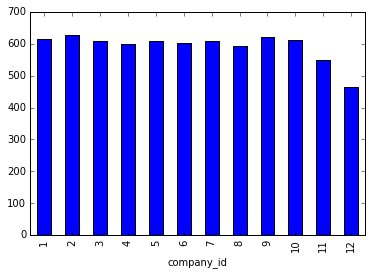

In [20]:
data.groupby('company_id')['employment_length'].mean().plot(kind='bar')

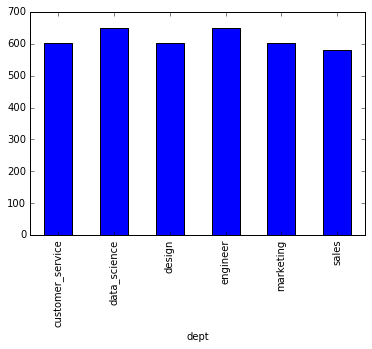

In [21]:
data.groupby('dept')['employment_length'].mean().plot(kind='bar')

In [23]:

max(data['salary'])


379000.0

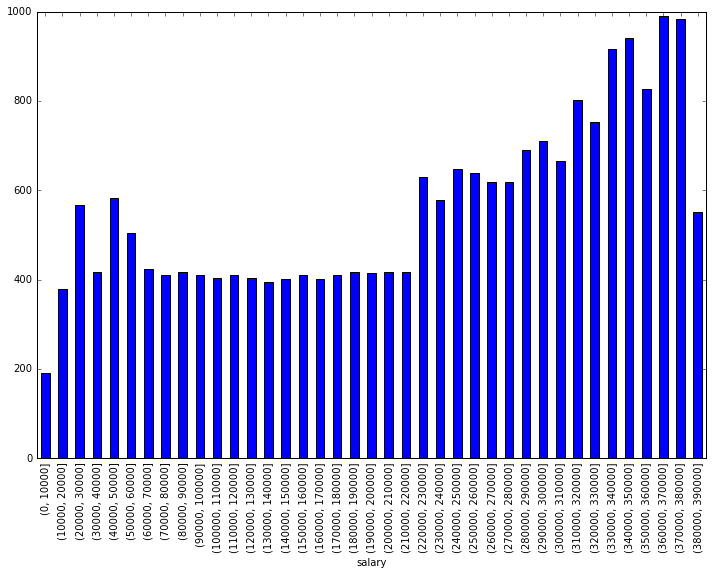

In [22]:

fig, ax = plt.subplots(figsize=(12, 8))
salary_range = pd.cut(data['salary'], range(0,400000, 10000))
data.groupby(salary_range)['employment_length'].median().plot(kind='bar')

## Modelling

In [24]:
data['dept_n'] = pd.factorize(data['dept'])[0]

Test r^2 score:  -0.274435114898
RMSE:  369.929368979
[ 0.          0.          0.08430888  0.91569112]


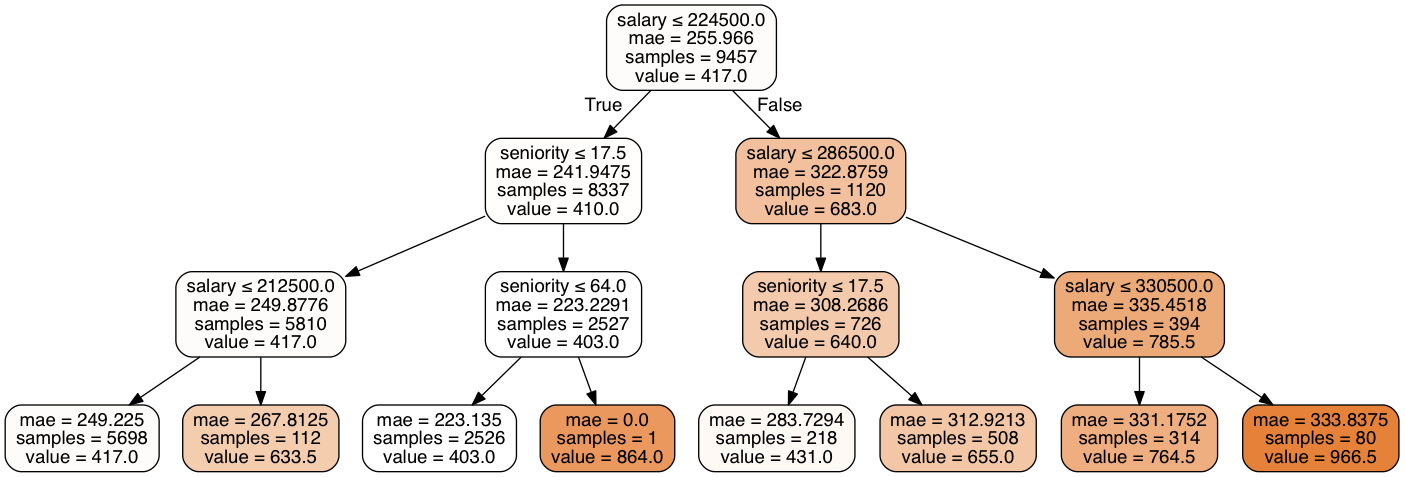

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import pydotplus
from IPython.display import Image  

cols = ['company_id', 'dept_n', 'seniority', 'salary']

X = data[cols]
Y = data['employment_length']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)
dtr = DecisionTreeRegressor(criterion='mae',random_state=20,max_depth = 3)
dtr.fit(X_train,y_train)
print("Test r^2 score: ",dtr.score(X_test,y_test))
y_test_pred = dtr.predict(X_test)
print("RMSE: ",(mean_squared_error(y_test,y_test_pred))**0.5)
print(dtr.feature_importances_)

dot_data = tree.export_graphviz(dtr, out_file=None,feature_names=cols,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('graph_dec_tree_1.pdf')
Image(graph.create_png())

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


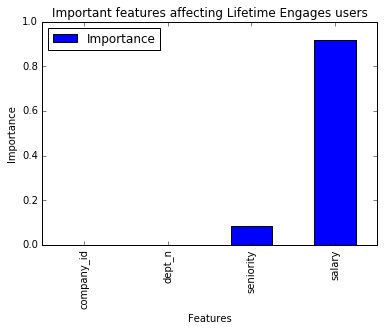

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
importance = dtr.feature_importances_
imp_features = pd.DataFrame({'Features': cols,'Importance': importance})
imp_features.sort(columns='Importance', inplace=True)
imp_features_1 = imp_features.plot(kind='bar')
_ = imp_features_1.set_xticklabels(imp_features['Features'])
_ = imp_features_1.set_xlabel('Features')
_ = imp_features_1.set_ylabel('Importance')
_ = imp_features_1.set_title('Important features affecting Lifetime Engages users')


Salary is the most important feature.